# Using tf lib

In [154]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Activation, Flatten, Input
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load image and label

In [155]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))


# Show example in data

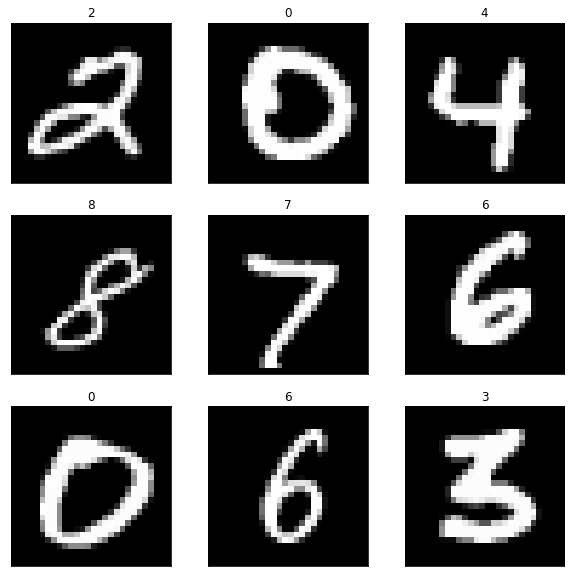

In [156]:
nums_image_show = 3
index = 0
plt.figure(figsize=(10,10))
for i in range(nums_image_show):
  for j in range(nums_image_show):
    ax = plt.subplot(nums_image_show, nums_image_show, index + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label[index])
    plt.imshow(image[index, :, :, 0], cmap='gray')
    index += 1
plt.show()

# Build model

In [157]:
def build_neural_network():
  model = Sequential()
  model.add(Input(shape=(28, 28, 1)))
  model.add(Dense(128))
  model.add(Dense(64))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [160]:
model = build_neural_network()

In [161]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 dense_28 (Dense)            (None, 28, 28, 64)        8256      
                                                                 
 flatten_9 (Flatten)         (None, 50176)             0         
                                                                 
 dense_29 (Dense)            (None, 10)                501770    
                                                                 
Total params: 510,282
Trainable params: 510,282
Non-trainable params: 0
_________________________________________________________________


# Split data to train set and test set

In [162]:
X_train, X_test, y_train, y_test = train_test_split(image, label, test_size=0.2)

# Train model

In [163]:
his = model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
250/250 [==============================] - 1s 4ms/step - loss: 3.3182 - accuracy: 0.7962
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 0.9203 - accuracy: 0.8620
Epoch 3/30
250/250 [==============================] - 1s 3ms/step - loss: 1.4752 - accuracy: 0.8604
Epoch 4/30
250/250 [==============================] - 1s 3ms/step - loss: 2.2922 - accuracy: 0.8652
Epoch 5/30
250/250 [==============================] - 1s 3ms/step - loss: 2.5873 - accuracy: 0.8685
Epoch 6/30
250/250 [==============================] - 1s 3ms/step - loss: 2.6709 - accuracy: 0.8766
Epoch 7/30
250/250 [==============================] - 1s 3ms/step - loss: 2.8839 - accuracy: 0.8808
Epoch 8/30
250/250 [==============================] - 1s 3ms/step - loss: 2.1748 - accuracy: 0.8970
Epoch 9/30
250/250 [==============================] - 1s 3ms/step - loss: 1.7756 - accuracy: 0.9020
Epoch 10/30
250/250 [==============================] - 1s 3ms/step - loss: 1.3851 - accuracy: 0.9105

# Valid

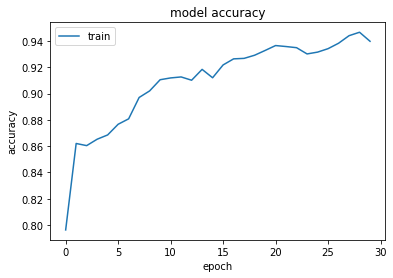

In [170]:
plt.plot(his.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

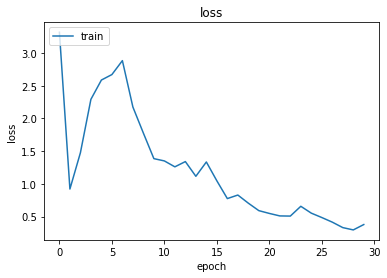

In [171]:
plt.plot(his.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predict test set

In [172]:
pred = model.predict(X_test)

In [173]:
y_pred = np.array([np.argmax(i) for i in pred])

In [174]:
y_pred

array([5, 4, 1, ..., 9, 1, 2])

In [175]:
y_test

array([3, 4, 1, ..., 9, 1, 2])

In [176]:
print(accuracy_score(y_test, y_pred))

0.8965


# Show confusion maxtrix

In [177]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[174   0   1   0   3   8  11   1   0   0]
 [  0 229   0   0   0   1   0   2   1   0]
 [  0   0 185   3   5   4   3   6   3   2]
 [  0   0   5 179   0   7   0   5   0   0]
 [  0   0   1   1 179   0   8   1   0   6]
 [  1   0   0  12   1 151   6   6   6   1]
 [  0   1   2   0   1   2 173   2   0   0]
 [  2   1   3   3   2   1   0 187   2   4]
 [  1   3   1   7   1   6   5   2 165   6]
 [  0   1   0   3   7   4   0  11   2 171]]


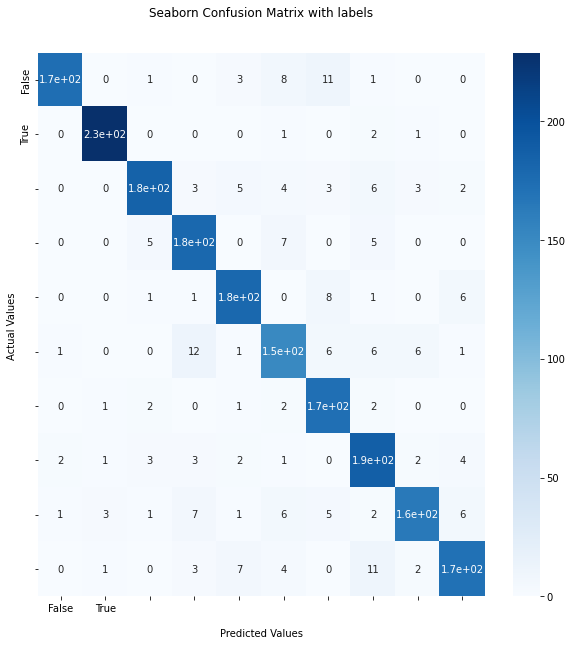

In [178]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()